# Predict The Flight Ticket Price (dynamice project -12)

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('flighttrain.csv',sep='\t',parse_dates=['Date_of_Journey','Arrival_Time'],na_values='nan')
data1
# Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.
# We might have often heard travellers saying that flight ticket prices are so unpredictable.
# Here we are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
#Size of training set: 10683 records
#Size of test set: 2671 records
# FEATURES:
## Airline: The name of the airline.
## Date_of_Journey: The date of the journey
## Source: The source from which the service begins.
## Destination: The destination where the service ends.
## Route: The route taken by the flight to reach the destination.
## Dep_Time: The time when the journey starts from the source.
## Arrival_Time: Time of arrival at the destination.
## Duration: Total duration of the flight.
## Total_Stops: Total stops between the source and destination.
## Additional_Info: Additional information about the flight
## Price: The price of the ticket (TARGET)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2020-09-11 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2020-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,2020-09-11 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,2020-09-11 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,2020-09-11 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,2020-09-11 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,2020-09-11 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,2020-09-11 14:10:00,2h 40m,non-stop,No info,12648


In [3]:
data2=pd.read_csv('flighttest.csv',sep='\t',parse_dates=['Date_of_Journey','Arrival_Time'],na_values='nan')
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,2020-06-07 04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,2020-09-11 10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,2020-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,2020-09-11 21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,2020-06-25 02:45:00,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,2020-06-07 20:25:00,23h 55m,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,2020-09-11 16:55:00,2h 35m,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,2020-03-07 04:25:00,6h 35m,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,2020-09-11 19:15:00,15h 15m,1 stop,No info


In [4]:
dftrain=pd.DataFrame(data=data1)
dftest=pd.DataFrame(data=data2) 

In [5]:
dftrain.shape,dftest.shape

((10683, 11), (2671, 10))

In [6]:
dftrain.info()
# Missing value noticed in 'route' & 'total stops'. we will drop those rows
# datatypes - 8 objects, 1 integer & 2 datatimestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 918.2+ KB


# EDA - Data Pre Processing 

In [8]:
df1=dftrain.copy()

In [9]:
df1.dropna(axis=0,inplace=True)
# dropping rows with missing value

In [10]:
df1.isnull().sum()
# no missing value present now

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
le=LabelEncoder()

In [14]:
df1['Airline']=le.fit_transform(df1['Airline'])
for i in df1['Airline'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

3=['IndiGo']
1=['Air India']
4=['Jet Airways']
8=['SpiceJet']
6=['Multiple carriers']
2=['GoAir']
10=['Vistara']
0=['Air Asia']
11=['Vistara Premium economy']
5=['Jet Airways Business']
7=['Multiple carriers Premium economy']
9=['Trujet']


In [15]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [16]:
df1['Source']=le.fit_transform(df1['Source'])
for i in df1['Source'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Banglore']
3=['Kolkata']
2=['Delhi']
1=['Chennai']
4=['Mumbai']


In [17]:
df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [18]:
df1['Destination']=le.fit_transform(df1['Destination'])
for i in df1['Destination'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

5=['New Delhi']
0=['Banglore']
1=['Cochin']
4=['Kolkata']
2=['Delhi']
3=['Hyderabad']


In [19]:
df1['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [20]:
df1['Route']=le.fit_transform(df1['Route'])
for i in df1['Route'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

18=['BLR → DEL']
84=['CCU → IXR → BBI → BLR']
118=['DEL → LKO → BOM → COK']
91=['CCU → NAG → BLR']
29=['BLR → NAG → DEL']
64=['CCU → BLR']
5=['BLR → BOM → DEL']
104=['DEL → BOM → COK']
103=['DEL → BLR → COK']
127=['MAA → CCU']
66=['CCU → BOM → BLR']
97=['DEL → AMD → BOM → COK']
123=['DEL → PNQ → COK']
105=['DEL → CCU → BOM → COK']
17=['BLR → COK → DEL']
113=['DEL → IDR → BOM → COK']
119=['DEL → LKO → COK']
78=['CCU → GAU → DEL → BLR']
122=['DEL → NAG → BOM → COK']
90=['CCU → MAA → BLR']
111=['DEL → HYD → COK']
80=['CCU → HYD → BLR']
106=['DEL → COK']
73=['CCU → DEL → BLR']
3=['BLR → BOM → AMD → DEL']
45=['BOM → DEL → HYD']
121=['DEL → MAA → COK']
48=['BOM → HYD']
102=['DEL → BHO → BOM → COK']
116=['DEL → JAI → BOM → COK']
99=['DEL → ATQ → BOM → COK']
117=['DEL → JDH → BOM → COK']
61=['CCU → BBI → BOM → BLR']
28=['BLR → MAA → DEL']
108=['DEL → GOI → BOM → COK']
101=['DEL → BDQ → BOM → COK']
87=['CCU → JAI → BOM → BLR']
60=['CCU → BBI → BLR']
24=['BLR → HYD → DEL']
125=['DEL → TRV → COK'

In [21]:
df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [22]:
df1['Total_Stops']=le.fit_transform(df1['Total_Stops'])
for i in df1['Total_Stops'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

4=['non-stop']
1=['2 stops']
0=['1 stop']
2=['3 stops']
3=['4 stops']


In [23]:
df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
df1['Additional_Info']=le.fit_transform(df1['Additional_Info'])
for i in df1['Additional_Info'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

8=['No info']
5=['In-flight meal not included']
7=['No check-in baggage included']
1=['1 Short layover']
6=['No Info']
0=['1 Long layover']
4=['Change airports']
3=['Business class']
9=['Red-eye flight']
2=['2 Long layover']


In [25]:
df2=dftest.copy()

In [26]:
df2['Airline']=le.fit_transform(df2['Airline'])

In [27]:
df2['Source']=le.fit_transform(df2['Source'])

In [28]:
df2['Destination']=le.fit_transform(df2['Destination'])

In [29]:
df2['Route']=le.fit_transform(df2['Route'])

In [30]:
df2['Total_Stops']=le.fit_transform(df2['Total_Stops'])

In [31]:
df2['Additional_Info']=le.fit_transform(df2['Additional_Info'])

# EDA on Date

In [33]:
Date_of_Journey_dates=pd.DataFrame()
Date_of_Journey_dates['month']=df1['Date_of_Journey'].dt.month_name()
Date_of_Journey_dates['year']=df1['Date_of_Journey'].dt.year
Date_of_Journey_dates['day']=df1['Date_of_Journey'].dt.day_name()
Date_of_Journey_dates['Price']=df1['Price']
Date_of_Journey_dates
# here we are trying analyse whether ticket prices are varrying on any particular month/day or weekends

,month,year,day,Price
0,March,2019,Sunday,3897
1,January,2019,Saturday,7662
2,September,2019,Friday,13882
3,December,2019,Thursday,6218
4,January,2019,Thursday,13302
...,...,...,...,...
10678,September,2019,Wednesday,4107
10679,April,2019,Saturday,4145
10680,April,2019,Saturday,7229
10681,January,2019,Thursday,12648


In [34]:
Date_of_Journey_dates['type_of_day']=np.where((Date_of_Journey_dates['day']=='Sunday')|(Date_of_Journey_dates['day']=='Saturday'),'weekend','weekday')
Date_of_Journey_dates

,month,year,day,Price,type_of_day
0,March,2019,Sunday,3897,weekend
1,January,2019,Saturday,7662,weekend
2,September,2019,Friday,13882,weekday
3,December,2019,Thursday,6218,weekday
4,January,2019,Thursday,13302,weekday
...,...,...,...,...,...
10678,September,2019,Wednesday,4107,weekday
10679,April,2019,Saturday,4145,weekend
10680,April,2019,Saturday,7229,weekend
10681,January,2019,Thursday,12648,weekday


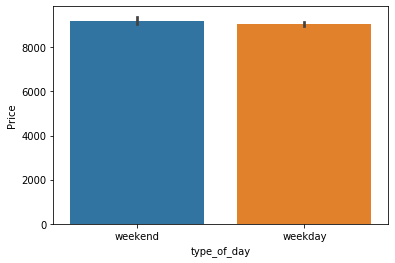

In [35]:
sns.barplot(x='type_of_day',y='Price',data=Date_of_Journey_dates)
plt.show()
# we can see price is NOT varrying on weekends oe weekdays 

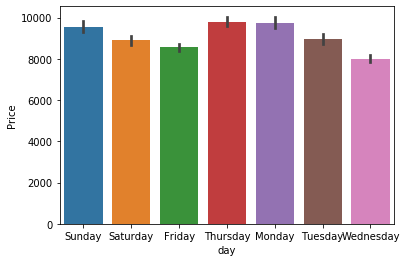

In [36]:
sns.barplot(x='day',y='Price',data=Date_of_Journey_dates)
plt.show()
# We can see Sunday, Monday & Thursday prices are higher than other days of the week 

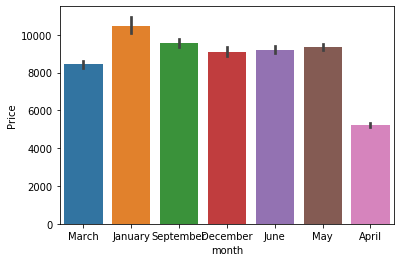

In [37]:
sns.barplot(x='month',y='Price',data=Date_of_Journey_dates)
plt.show()
# month of January reports highest prices for tickets & month of April reports the lowest.

In [38]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,5,18,22:20,2020-03-22 01:10:00,2h 50m,4,8,3897
1,1,2019-01-05,3,0,84,05:50,2020-09-11 13:15:00,7h 25m,1,8,7662
2,4,2019-09-06,2,1,118,09:25,2020-06-10 04:25:00,19h,1,8,13882
3,3,2019-12-05,3,0,91,18:05,2020-09-11 23:30:00,5h 25m,0,8,6218
4,3,2019-01-03,0,5,29,16:50,2020-09-11 21:35:00,4h 45m,0,8,13302


In [39]:
Arrival_Time_dates=pd.DataFrame()
Arrival_Time_dates['month']=df1['Date_of_Journey'].dt.month_name()
Arrival_Time_dates['year']=df1['Date_of_Journey'].dt.year
Arrival_Time_dates['day']=df1['Date_of_Journey'].dt.day_name()
Arrival_Time_dates['Price']=df1['Price']
Arrival_Time_dates

,month,year,day,Price
0,March,2019,Sunday,3897
1,January,2019,Saturday,7662
2,September,2019,Friday,13882
3,December,2019,Thursday,6218
4,January,2019,Thursday,13302
...,...,...,...,...
10678,September,2019,Wednesday,4107
10679,April,2019,Saturday,4145
10680,April,2019,Saturday,7229
10681,January,2019,Thursday,12648


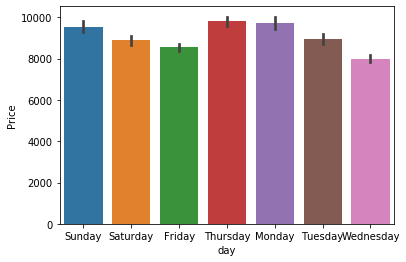

In [40]:
sns.barplot(x='day',y='Price',data=Arrival_Time_dates)
plt.show()
# we can observe similar patterns on arrival time-ticket price analysis too

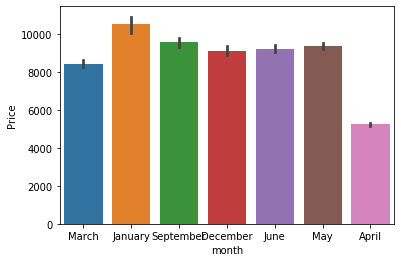

In [41]:
sns.barplot(x='month',y='Price',data=Arrival_Time_dates)
plt.show()

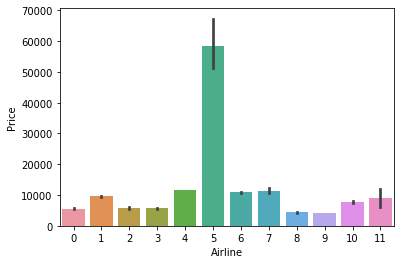

In [42]:
sns.barplot(x='Airline',y='Price',data=df1)
plt.show() # Jet Airways Business reports to have the highest ticket price

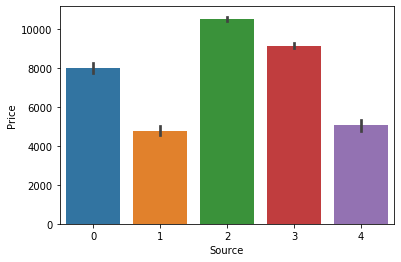

In [43]:
sns.barplot(x='Source',y='Price',data=df1)
plt.show()
# flights starting from chennai are having lowest ticket prices 
# flights starting from Delhi & Kolkata are having ticket prices on higher side

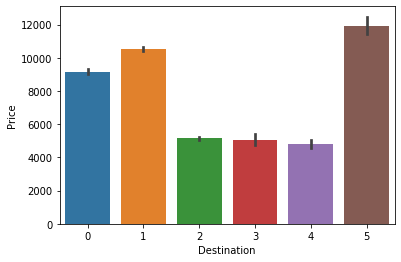

In [44]:
sns.barplot(x='Destination',y='Price',data=df1)
plt.show()
# flights going to New Delhi are most expoensive among all estinations present in the datset while kolkata is the cheapest destination 

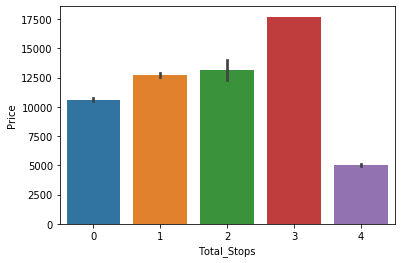

In [45]:
sns.barplot(x='Total_Stops',y='Price',data=df1)
plt.show()
# Non stop flights are the cheapest

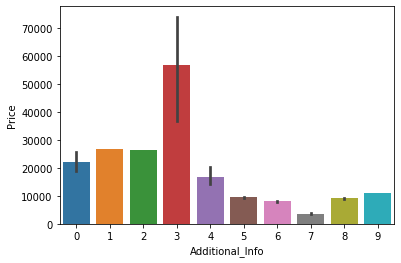

In [46]:
sns.barplot(x='Additional_Info',y='Price',data=df1)
plt.show()
# Business class passengers are paying the highest ticket prices 
# flights with 'no check-in baggage' facility is the cheapest

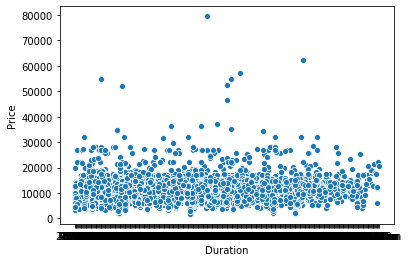

In [47]:
sns.scatterplot(x='Duration',y='Price',data=df1)
plt.show()

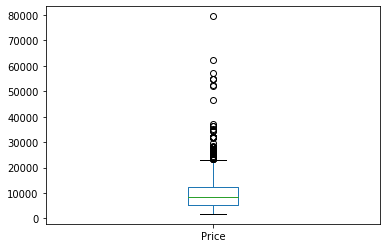

In [48]:
df1['Price'].plot.box()
## Checking box plot on range of ticketprices. It ranges between 5-1500 units on average 
## outliers are possibly ticket prices for business class passengers 

In [49]:
df1.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
dtype: float64

In [50]:
df1['Destination']=np.log1p(df1['Destination'])

In [51]:
df1['Additional_Info']=np.cbrt(df1['Additional_Info'])

In [52]:
df1.skew()

Airline            0.731057
Source            -0.424023
Destination        0.283053
Route             -0.501911
Total_Stops        0.631532
Additional_Info   -5.525668
Price              1.812405
dtype: float64

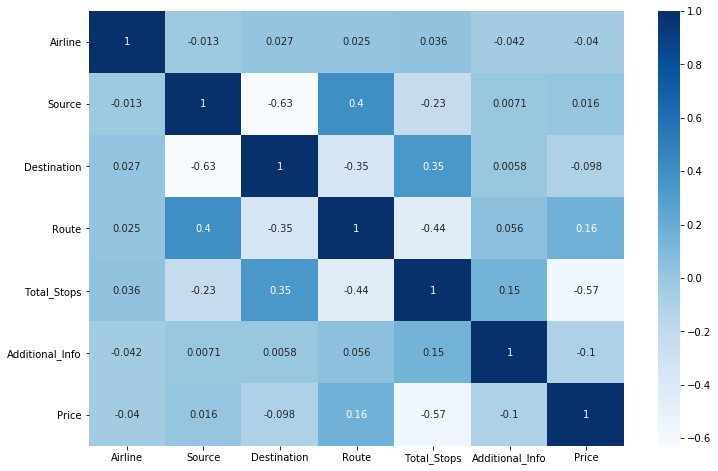

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
# Checking co-relation between all the attribute
# number to total stops is having negative relation with ticket price

In [54]:
df1n=df1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

Cleaning the Dataset & handling Skewness

In [55]:
z=np.abs(zscore(df1n))
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
        9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
       10382, 10438, 10510, 10510], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,

In [56]:
df1new=df1n[(z<3).all(axis=1)]
df1new.shape

(10577, 7)

In [57]:
df1new.skew()

Airline            0.731671
Source            -0.439175
Destination        0.284917
Route             -0.511212
Total_Stops        0.618057
Additional_Info   -1.545609
Price              0.410987
dtype: float64

In [58]:
df1new['Additional_Info']=np.log1p(df1new['Additional_Info'])

In [59]:
df1new.skew()

Airline            0.731671
Source            -0.439175
Destination        0.284917
Route             -0.511212
Total_Stops        0.618057
Additional_Info   -1.549516
Price              0.410987
dtype: float64

In [60]:
df2n=df2.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1)

# Model Training 

In [ ]:
x=df1new.iloc[:,0:-1]
y=df1new.iloc[:,-1]
x_testt=df2n

In [62]:
x.shape,x_testt.shape,y.shape

((10577, 6), (2671, 6), (10577,))

In [63]:
sc=StandardScaler()
x=sc.fit_transform(x)
# Scalling the overfitting/underfitting of the model

In [64]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.3908507810555236
accuracy score correspondng to random state 42 is: 0.39519155333094047
accuracy score correspondng to random state 43 is: 0.38780694739022625
accuracy score correspondng to random state 44 is: 0.39530353929868844
accuracy score correspondng to random state 45 is: 0.4014618881204692
accuracy score correspondng to random state 46 is: 0.39657224773175914
accuracy score correspondng to random state 47 is: 0.39900729470100554
accuracy score correspondng to random state 48 is: 0.39809170486986845
accuracy score correspondng to random state 49 is: 0.3911764469460294
accuracy score correspondng to random state 50 is: 0.39641958141241274
accuracy score correspondng to random state 51 is: 0.3884324072577947
accuracy score correspondng to random state 52 is: 0.40144391187764183
accuracy score correspondng to random state 53 is: 0.4007386387789441
accuracy score correspondng to random state 54 is: 0.3995697386453205
accuracy sco

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.3)

In [66]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [67]:
print('score:',lm.score(x_train,y_train))

score: 0.40277418963912026


In [68]:
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.40152426572334504
{'alpha': 1.0}


In [69]:
ls=Lasso(alpha=1.0)
ls.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
ls.score(x_train,y_train)

0.4027737381851394

In [71]:
el=ElasticNet()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(el,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.4015181157950498
{'alpha': 0}


In [72]:
el=ElasticNet(alpha=0)
el.fit(x_train,y_train)

ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
el.score(x_train,y_train)

0.40277418963912026

In [74]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
scoresvr=svr.score(x_train,y_train)
predsvr=svr.predict(x_testt)
print(scoresvr)

0.3321637313524013


In [ ]:
# None of the above algorithms are poviding good enough score 
# so lets use ensemble techniques to boost the score 

In [75]:
rf=RandomForestRegressor(n_estimators=400,random_state=60)

In [76]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
# used ensemble technique to achieve better score

0.7963541323085803


In [77]:
x_testt=sc.fit_transform(x_testt)

In [78]:
predict=rf.predict(x_testt)
predict

array([15112.64976284,  4881.05791302, 10596.62298969, ...,
       15112.64976284,  9545.1082988 , 10944.51839726])

Saving the Model 

In [80]:
joblib.dump(rf,'rfticketprice.obj')

['rfticketprice.obj']